## Week 9 and 10

Complete the following exercises. You can submit a Jupyter Notebook or a PDF of your code. If you submit a .py file you need to also include a PDF or attachment of your results.

1. Data Wrangling with Python: Activity 9, page 294

2. Data Wrangling with Python: Activity 10, page 295

3. Connect to the Twitter API and do a simple data pull

a. If you don’t have a twitter account – create one at twitter.com/signup (you can delete the account after this assignment)

b. Sign in to apps.twitter.com

c. Click “Create New App”

d. Give your app a name and description

e. Agree to the developer agreement – you will want to make sure to indicate this is for a class project, and this step can take several days to get through, so don’t wait until last minute to complete this portion of the assignment

f. Create an access token

g. You should receive a consumer key and a token

h. Using either the instructions from the book on connecting to an API or for help look here – pull back data searching for “Bellevue University” and “Data Science” (or something else you are interested in)

i. How to Create a Twitter App and API Interface via Python. (Grogan, 2016)

ii. Welcome Python-Twitter’s Documentation!  (The Python-Twitter Developers, 2016)

4. Using one of the datasets provided in Weeks 7 & 8, or a dataset of your own, choose 3 of the following visualizations to complete. You must submit via PDF along with your code. You are free to use Matplotlib, Seaborn or another package if you prefer.

a. Line

b. Scatter

c. Bar

d. Histogram

e. Density Plot

f. Pie Chart

Your exercises are due two weeks from Sunday by Midnight of Week 10. Refer to the rubric for more grading detail.


## Solution below

# Part 1
## 1. Data Wrangling with Python: Activity 9, page 294

### Activity 9 : Extracting the Top 100 eBooks from Gutenberg

### Project Gutenberg encourages the creation and distribution of ebooks by encouraging volunteer efforts to digitize and archive cultural works. This activity aims to scrape the URL of Project Gutenbergs Top 100 eBooks to identify the ebooks Links. Its uses BeatifulSoup4 to parse the HTML and regular expression code to identify the Top 100 ebook file numbers

In [1]:
# Step 1: Import necessary libraries 
import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import ssl
import re

In [2]:
# Step 2: Check the SSL Certificate
# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

In [3]:
# Step 3: Read HTML from the URL
# Read the HTML from the URL and pass on to BeautifulSoup
url = 'https://www.gutenberg.org/browse/scores/top'
response = requests.get(url)

In [4]:
# Step 4: Function to check the response status

def check_response_status(req):
    if req.status_code==200:
        print("Request Success...")
        return 1
    else:
        print("Request Failed...")
        return -1
# Checking status of the response
check_response_status(response)

Request Success...


1

In [5]:
# Step 5: Decode the html text data and parse it with the help of BeautifulSoap library
contents = response.content.decode(response.encoding)
soup = BeautifulSoup(contents, 'html.parser')

In [6]:
# Step 6: Find all href tags and store them in the list of links
# Check the list and print first 30 elements
# Empty list to hold all the http links in the HTML page

# initialising links to hold the List of books
links=[]

# Find all the href tags and store them in the list of links <a href=''></a>
# Here <a> is tag, so will find all <a> and then href is the URL of books.
for link in soup.find_all('a'):
    #print(link.get('href'))
    links.append(link.get('href'))
    
# Printing first 30 elements   
links[:30]


['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

In [7]:
links[:30]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

In [8]:
print("Total Links:", len(links))

Total Links: 675


In [10]:
# Step 7: Use regex to find numeric digits in the links. These are file numbers for the top 100 eBooks
# Checking from where do these 100 books start by looking at the number pattern
for i in range(0,len(links)):
    link=links[i]
    link=link.strip()
    # Regular expression to find the numeric digits in the link (href) string
    # when there is a book it starts as /ebooks/<number> so checking for the same pattern
    n=re.findall('/ebooks/[0-9]+',link)
    # print("all links which hase number in link:",n)
    if len(n)==1:
        #As soon as we find the pattern, we break and print the position
        print(i,"-",link)
        continue; 
        

33 - /ebooks/1342
34 - /ebooks/84
35 - /ebooks/46
36 - /ebooks/11
37 - /ebooks/6133
38 - /ebooks/43
39 - /ebooks/1080
40 - /ebooks/64317
41 - /ebooks/1661
42 - /ebooks/25344
43 - /ebooks/98
44 - /ebooks/2701
45 - /ebooks/2542
46 - /ebooks/1260
47 - /ebooks/174
48 - /ebooks/1952
49 - /ebooks/5200
50 - /ebooks/16
51 - /ebooks/844
52 - /ebooks/1232
53 - /ebooks/120
54 - /ebooks/2852
55 - /ebooks/219
56 - /ebooks/1400
57 - /ebooks/205
58 - /ebooks/76
59 - /ebooks/345
60 - /ebooks/74
61 - /ebooks/16328
62 - /ebooks/25929
63 - /ebooks/64323
64 - /ebooks/4014
65 - /ebooks/514
66 - /ebooks/23
67 - /ebooks/1250
68 - /ebooks/408
69 - /ebooks/2591
70 - /ebooks/2097
71 - /ebooks/1497
72 - /ebooks/45
73 - /ebooks/158
74 - /ebooks/160
75 - /ebooks/4300
76 - /ebooks/2600
77 - /ebooks/55
78 - /ebooks/64316
79 - /ebooks/215
80 - /ebooks/64320
81 - /ebooks/1184
82 - /ebooks/58585
83 - /ebooks/244
84 - /ebooks/19942
85 - /ebooks/3825
86 - /ebooks/36
87 - /ebooks/2814
88 - /ebooks/768
89 - /ebooks/3207
90

In [11]:
# Step 8: Initialize the empty list to hold the filenumbers over an appropriate range
# and use regex to find the numneric digits in the link href using string. Use findall method

# initialising
booknumbers=[]

# if we inspect the url page, we find that the table/section for top 100 starts after '#authors-last30'
# If you observe abouve result the book number links starts from   number 33 so we will read from 33   to 133. 

for i in range(33,133):
    link=links[i]
    link=link.strip()
    # Regular expression to find the numeric digits in the link (href) string
    n=re.findall('[0-9]+',link)
    if len(n)==1:
        # Append the filenumber casted as integer
        booknumbers.append(int(n[0]))
        
print("\nThe file numbers for the top 100 ebooks on Gutenberg are shown below\n"+"-"*68)
print(booknumbers)

n ['1342']
n ['84']
n ['46']
n ['11']
n ['6133']
n ['43']
n ['1080']
n ['64317']
n ['1661']
n ['25344']
n ['98']
n ['2701']
n ['2542']
n ['1260']
n ['174']
n ['1952']
n ['5200']
n ['16']
n ['844']
n ['1232']
n ['120']
n ['2852']
n ['219']
n ['1400']
n ['205']
n ['76']
n ['345']
n ['74']
n ['16328']
n ['25929']
n ['64323']
n ['4014']
n ['514']
n ['23']
n ['1250']
n ['408']
n ['2591']
n ['2097']
n ['1497']
n ['45']
n ['158']
n ['160']
n ['4300']
n ['2600']
n ['55']
n ['64316']
n ['215']
n ['64320']
n ['1184']
n ['58585']
n ['244']
n ['19942']
n ['3825']
n ['36']
n ['2814']
n ['768']
n ['3207']
n ['64319']
n ['57426']
n ['2554']
n ['140']
n ['113']
n ['730']
n ['135']
n ['5740']
n ['34901']
n ['996']
n ['42108']
n ['2500']
n ['64321']
n ['863']
n ['1727']
n ['1934']
n ['8102']
n ['766']
n ['236']
n ['35']
n ['35899']
n ['64318']
n ['3600']
n ['1998']
n ['376']
n ['64326']
n ['829']
n ['1001']
n ['902']
n ['203']
n ['521']
n ['147']
n ['41']
n ['32854']
n ['15399']
n ['60479']
n ['64314']


In [37]:
# Step 9: What does soup objects text look like? Use the .text method and print only the first 2000 chars.
print(soup.text[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright Procedures
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2021-01-08188279
last 7 days1329813
last 30 days4959325



Top 100 EBooks yesterd

In [13]:
# Step 10: Search in the extracted text(using regex) from the soup object to find the 
# names of the top 100 eBooks - yesterday's ranking
# Step 11: Create Starting index. Its should point at the Text - Top 100 EBooks yesterday
# Use splitlines method of the soup.text. It splits the lines of text of the soup object
yesterdays_titles_temp=[]
start_idx=soup.text.splitlines().index('Top 100 EBooks yesterday')


# Step 12: Loop 1-100 to add the strings of the next 100 lines to this temporary list.
#print(start_idx)
for i in range(100):
    # adding 10 as each section has additional links and spaces
    yesterdays_titles_temp.append(soup.text.splitlines()[start_idx+10+i])

# Step 13: Use regex to extract only text from the name strings and append it to an empty list
# Use match and span to find indices and use them
# Self Note: Regex Cheat sheet for reference: https://www.debuggex.com/cheatsheet/regex/python
yesterdays_titles=[]
for i in range(100):
    # Self Notes - \w+ included for Umlauts, some book names have
    # Also added ,;:.\' as book names have them apart from alphabets
    # Additionally if i remove a-zA-Zthe umlauts dissapear from the names when printing
    id1,id2=re.match(r'^[a-zA-Z;:,\'.\w+ ]*',yesterdays_titles_temp[i]).span()
    yesterdays_titles.append(yesterdays_titles_temp[i][id1:id2])
    
for l in yesterdays_titles:
    print(l)

Pride and Prejudice by Jane Austen 
Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley 
A Christmas Carol in Prose; Being a Ghost Story of Christmas by Charles Dickens 
Alice's Adventures in Wonderland by Lewis Carroll 
Arsène Lupin, gentleman
The Strange Case of Dr. Jekyll and Mr. Hyde by Robert Louis Stevenson 
A Modest Proposal by Jonathan Swift 
The Great Gatsby by F. Scott  Fitzgerald 
The Adventures of Sherlock Holmes by Arthur Conan Doyle 
The Scarlet Letter by Nathaniel Hawthorne 
A Tale of Two Cities by Charles Dickens 
Moby Dick; Or, The Whale by Herman Melville 
Et dukkehjem. English by Henrik Ibsen 
Jane Eyre: An Autobiography by Charlotte Brontë 
The Picture of Dorian Gray by Oscar Wilde 
The Yellow Wallpaper by Charlotte Perkins Gilman 
Metamorphosis by Franz Kafka 
Peter Pan by J. M.  Barrie 
The Importance of Being Earnest: A Trivial Comedy for Serious People by Oscar Wilde 
Il Principe. English by Niccolò Machiavelli 
Treasure Island by Robert Louis

# Part 2
## 2. Data Wrangling with Python: Activity 10, page 295
### In this activity, you will build a complete movie database by communicating and interfacing with a free API
### You will learn about obtaining a unique user key that mist be used when your program tried to access API
### The activity will teach you general chapters about working with an API

## The aims of the activity are
### a. To retrieve and print the basic data about a movie - (title entered by user) - from the web(OMDb)
### b. If a poster of movie can be found, it downloads the file and saves it at a user specified location

In [43]:
# Step 1: Import libraries
import urllib.request, urllib.parse, urllib.error
import json

In [44]:
# Step 2: Load the secret API Key(get one from OMDb wesite and use that: it has daily limit of 1000) from a json
# stored in the same folder in a variable by using json.loads
# Step 3: Obtain a key and store it in APIkeys.json -- File stored in the current directory
# Recieved below key from the website
# http://www.omdbapi.com/?i=tt3896198&apikey=ec261823
# Step 4: Open the APIKeys.json file

# Reading APIkeys.json file
with open("APIkeys.json") as file:
   json_data = file.read()

data = json.loads(json_data)
data


{'key': 'ec261823'}

In [45]:
# Step 5: Assign the OMDb portal as a string to variable
# http://www.omdbapi.com/?
serviceurl='http://www.omdbapi.com/?'

# Step 6: Create a variable called apikey with last portion of the url
apikey='&apikey='+data['key']
#print(apikey)

In [47]:
# Step 7: Write a Utility function called print_json to print the movie data from a json file
# which we will get from the portal

# Sample Response
# {"Title":"Titanic","Year":"1997","Rated":"PG-13","Released":"19 Dec 1997","Runtime":"194 min","Genre":"Drama, 
# Romance","Director":"James Cameron","Writer":"James Cameron","Actors":"Leonardo DiCaprio, Kate Winslet, 
# Billy Zane, Kathy Bates","Plot":"A seventeen-year-old aristocrat falls in love with a kind but poor artist 
# aboard the luxurious, ill-fated R.M.S. Titanic.","Language":"English, Swedish, Italian, French","Country":"USA, 
# Mexico, Australia, Canada","Awards":"Won 11 Oscars. Another 112 wins & 83 nominations.",
# "Poster":"https://m.media-amazon.com/images/M/MV5BMDdmZGU3NDQtY2E5My00ZTliLWIzOTUtMTY4ZGI1YjdiNjk3XkEyXkFqcGdeQXVyNTA4NzY1MzY@._V1_SX300.jpg",
# "Ratings":[{"Source":"Internet Movie Database","Value":"7.8/10"},{"Source":"Rotten Tomatoes","Value":"89%"},{"Source":"Metacritic","Value":"75/100"}],
# "Metascore":"75","imdbRating":"7.8","imdbVotes":"1,036,570","imdbID":"tt0120338","Type":"movie","DVD":"N/A","BoxOffice":"$659,363,944","Production":
# "20th Century Fox, Lightstorm Entertainment, Paramount Pictures","Website":"N/A","Response":"True"}

def print_json(response):
    # Print some information that we may need to view
    # This can be expanded, based on what all attributes we need to read
    print('Title    - {}'.format(response['Title']))
    print('Year     - {}'.format(response['Year']))
    print('Rated    - {}'.format(response['Rated']))
    print('Released - {}'.format(response['Released']))
    print('Runtime  - {}'.format(response['Runtime']))
    print('Genre    - {}'.format(response['Genre']))
    print('Director - {}'.format(response['Director']))
    print('Writer   - {}'.format(response['Writer']))
    print('Actors   - {}'.format(response['Actors']))
    print('Language - {}'.format(response['Language']))
    print('Country  - {}'.format(response['Country']))
    print('Awards   - {}'.format(response['Awards']))


In [48]:
# Step 8: Write a utility function to download the poster of the movie based on the information from json dataset and
# save it on you local folder. Use the os module. The poster data is stored in JSON key Poster
# Use the python command to open a file and write the poster data. Close the file after you are done.
# This function will store poster data as an image file
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from urllib.request import urlretrieve

def download_poster(movie,json_response):
    # URL from where poster needs to be downloaded
    url_poster = json_response['Poster']
    #print(url_poster)
    
    # reading the poster file
    #request = urllib.equest(url_poster)
    #pic = urllib2.urlopen(request)
    uh = urllib.request.urlopen(url_poster)
    pic = uh.read()
    
    # Checking the extension of file
    filename, file_extension = os.path.splitext(url_poster)
    # Getting local path. Will save the file in same directory
    localpath = os.getcwd()
    filepath=localpath+"\\"+movie+file_extension
    
    # This closes the file automatically, so no need to close manually
    with open(movie+file_extension, "wb") as my_file:
        my_file.write(pic)
    
    # Self Notes
    # this works but we have to use the os module - This was an easy one liner
    # urllib.request.urlretrieve(url_poster, movie+".jpg")
    print("Poster Saved in Local Folder:",filepath)
    
    # Displaying Image: from local path
    # Loading image in Color
    image_bgr = cv2.imread(filepath, cv2.IMREAD_COLOR)
    # Show Image
    plt.imshow(image_bgr), plt.axis("off")
    plt.show()


In [49]:
# Step 9: Write utility function search_movie to 
# a. search a movie by its name
# b. print downloaded json
# c. save movie poster in local folder
# Use a try - except loop for this. Use the previous created serviceurl and apikey variables.
# You have to pass on a dictionary with a key, t. and the movie name as the 
# corresponding variable to urllib.parse.urlencode() function and then add the serviceurl and apikey to the output
# of the function to construct full URL
# This fullURL will be used to access the data.
# Json data has key called Response. If its is True, that means read was successful. Check this before processing.
# If not successful, print "JSON key Error", which will contain the appropriate error message returned by the movie database

def search_movie(movie):
    
    try:
        url = serviceurl + urllib.parse.urlencode({'t':movie})+apikey
        # print(url)
        uh = urllib.request.urlopen(url)
        data = uh.read().decode()
        rsp_json = json.loads(data)
        #print_json(data)
        #print(rsp_json)
        if(rsp_json['Response']=='True'):
            # pretty printing using previous function created
            print_json(rsp_json)
            # downloading poster
            download_poster(movie,rsp_json)
        else:
            print('JSON key Error')
            # print(rsp_json)
            print(rsp_json['Error'])
    except Exception as e:
        print('Exception')
        print("\033[91m", e, "\033[0m")
        


    
    

Title    - Titanic
Year     - 1997
Rated    - PG-13
Released - 19 Dec 1997
Runtime  - 194 min
Genre    - Drama, Romance
Director - James Cameron
Writer   - James Cameron
Actors   - Leonardo DiCaprio, Kate Winslet, Billy Zane, Kathy Bates
Language - English, Swedish, Italian, French
Country  - USA, Mexico
Awards   - Won 11 Oscars. Another 112 wins & 83 nominations.
Poster Saved in Local Folder: /Users/dhirajbankar/Coding540\Titanic.jpg
Exception
 Image data of dtype object cannot be converted to float 


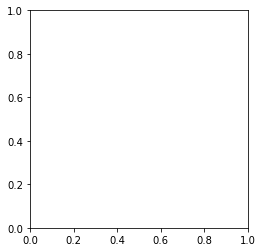

In [50]:
# Step 10: Test the search_movie function by entering Titanic
search_movie("Titanic")

In [51]:
# Step 11: Test the search movie function by entering "Random_error"
search_movie("Random_error")

JSON key Error
Movie not found!


# Part 3

3. Connect to the Twitter API and do a simple data pull

a. If you don’t have a twitter account – create one at twitter.com/signup (you can delete the account after this assignment) - Created

b. Sign in to apps.twitter.com - Done

c. Click “Create New App” -- SELF NOTES - Before doing so, we need to have developer access to the account.

d. Give your app a name and description - Done

e. Agree to the developer agreement – you will want to make sure to indicate this is for a class project, and this step can take several days to get through, so don’t wait until last minute to complete this portion of the assignment - Done

f. Create an access token - Done

g. You should receive a consumer key and a token - Done

h. Using either the instructions from the book on connecting to an API or for help look here – pull back data searching for “Bellevue University” and “Data Science” (or something else you are interested in)

i. How to Create a Twitter App and API Interface via Python. (Grogan, 2016)

ii. Welcome Python-Twitter’s Documentation!  (The Python-Twitter Developers, 2016)

In [23]:
# installed twitter library
# pip install python-twitter

# Reading Keys which are stored separate from github
# Reading twitter.json file
with open("C:/git-bellevue/twitter-keys/twitter.json") as file:
   json_data = file.read()
data = json.loads(json_data)

# Don't display these
# data
#print(data['APIKey'])
#print(data['APISecretKey'])
#print(data['BearerToken'])
#print(data['AccessToken'])
#print(data['AccessTokenSecret'])

FileNotFoundError: [Errno 2] No such file or directory: 'C:/git-bellevue/twitter-keys/twitter.json'

In [24]:
# Following the same code snippets as in example.
# https://www.sitepoint.com/how-to-create-a-twitter-app-and-api-interface-via-python/

import twitter

api = twitter.Api(consumer_key=data['APIKey'],
  consumer_secret=data['APISecretKey'],
    access_token_key=data['AccessToken'],
    access_token_secret=data['AccessTokenSecret'])

# Verified - Connection is Successful
#print(api.VerifyCredentials())

# Checks 10 tweets on Data Science from given date
json_response = api.GetSearch(term='Data Science', since=2016-11-21, count=10)
print("Search Result for Data Science")
print(json_response)

json_response = api.GetSearch(term='Bellevue University', since=2016-11-21, count=10)
print("Search Result for Bellevue University")
print(json_response)


ModuleNotFoundError: No module named 'twitter'

4. Using one of the datasets provided in Weeks 7 & 8, or a dataset of your own, choose 3 of the following visualizations to complete. You must submit via PDF along with your code. You are free to use Matplotlib, Seaborn or another package if you prefer.

a. Line - Plotted 2 Examples

b. Scatter

c. Bar - Plotted 2 Examples

d. Histogram

e. Density Plot

f. Pie Chart - Plotted 2 Examples

In [25]:
# importing required libraries packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
# Creating Sample Data , based on the above statement
subjects = ['Physics','Chemistry','Maths','English', 'Computer Science','Social Studies']
studentCount = [5, 4, 8, 11, 7, 11]

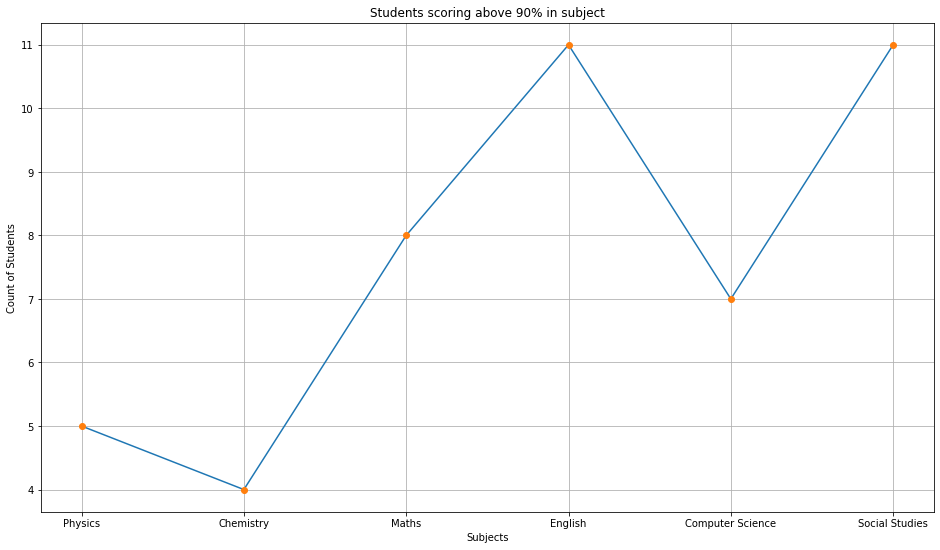

In [27]:
# Line Plot
plt.figure(figsize=(16,9))
plt.plot(subjects, 
        studentCount);
plt.plot(subjects, 
        studentCount,
         'o');
plt.grid(True)
plt.title("Students scoring above 90% in subject")
plt.ylabel("Count of Students")
plt.xlabel("Subjects")
plt.savefig("Fig-1.pdf")
plt.show()



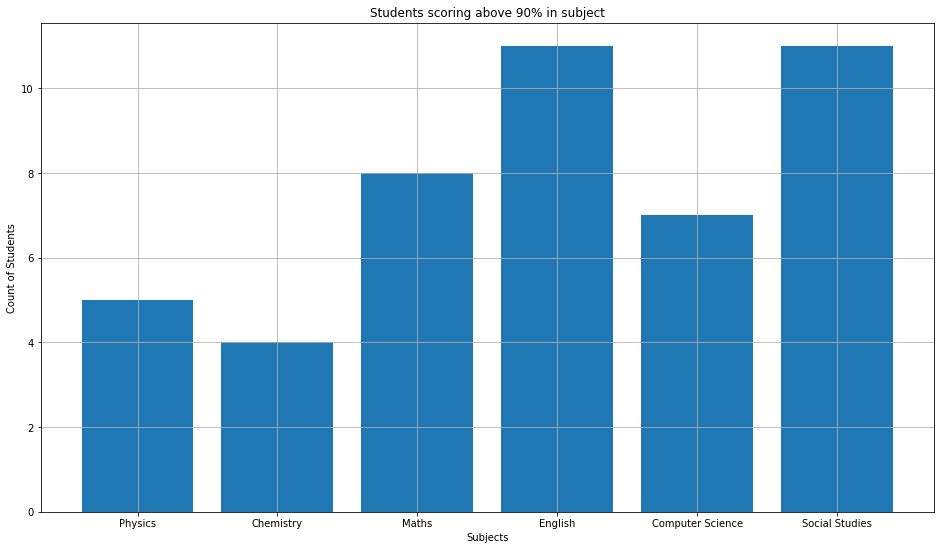

In [28]:
# Bar Chart/Plot
plt.figure(figsize=(16,9))
plt.bar(subjects, 
        studentCount);
plt.grid(True)
plt.title("Students scoring above 90% in subject")
plt.ylabel("Count of Students")
plt.xlabel("Subjects")
plt.savefig("Fig-2.pdf")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

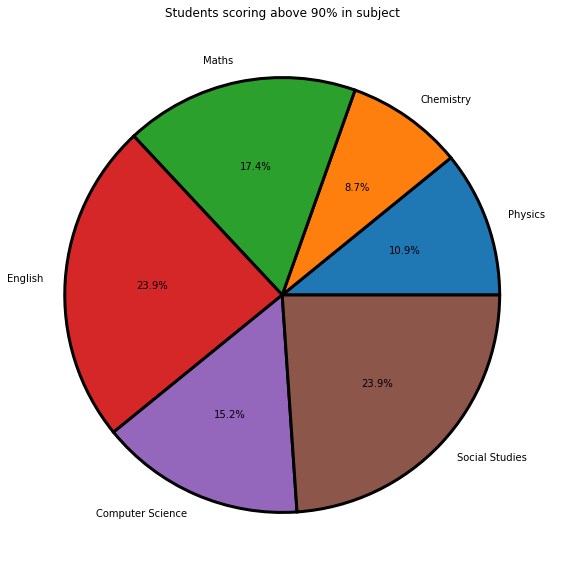

In [29]:
# Pie Chart
plt.figure(figsize=(10,10))
plt.pie(studentCount, 
        labels=subjects, 
        autopct = lambda p:f'{p:.1f}%', 
        wedgeprops={"edgecolor":"black",
                    'linewidth': 3,
                    'linestyle': 'solid', 
                    'antialiased': True});
plt.title("Students scoring above 90% in subject")
plt.savefig("Fig-3.pdf")
plt.show

In [30]:
# Step: Read XLS file from local directory
df_ff = pd.read_excel("../FinalProject/13. PC Wise Voters Turn Out.xls", skiprows=3,skipfooter=5)
df_ff.head()

FileNotFoundError: [Errno 2] No such file or directory: '../FinalProject/13. PC Wise Voters Turn Out.xls'

In [31]:
# a simple bar plot
df_ff.plot(kind='bar',x=' PC NAME ',y=' ELECTORS ')

NameError: name 'df_ff' is not defined

In [32]:
df_ff[' ELECTORS '] = df_ff[' ELECTORS '].astype(int)

# Bar Chart/Plot
# Changing width to quite high value as 545 entries
plt.figure(figsize=(80,9))
plt.bar(df_ff[' PC NAME '], 
        df_ff[' ELECTORS ']/1000000);
#plt.grid(True)
plt.title("Electors")
plt.ylabel("Count in millions")
plt.xlabel("PC Names")
plt.xticks(rotation='vertical')
plt.savefig("Fig-4.pdf")
plt.show()

NameError: name 'df_ff' is not defined

In [33]:
# Line Plot
plt.figure(figsize=(60,9))
plt.plot(df_ff[' PC NAME '], 
        df_ff[' ELECTORS ']/1000000);
plt.plot(df_ff[' PC NAME '], 
        df_ff[' ELECTORS ']/1000000,
         'X');
plt.grid(False)
plt.title("Electors")
plt.ylabel("Count in millions")
plt.xlabel("PC Names")
plt.xticks(rotation='vertical')
plt.savefig("Fig-5.pdf")
plt.show()



# Although Lineplot is not relevant here.
# See some issues. Will check later

NameError: name 'df_ff' is not defined

<Figure size 4320x648 with 0 Axes>

In [34]:
# Pie Chart
plt.figure(figsize=(100,100))
plt.pie(df_ff[' ELECTORS '], 
        labels=df_ff[' PC NAME '], 
        autopct = lambda p:f'{p:.1f}%', 
        wedgeprops={"edgecolor":"black",
                    'linewidth': 3,
                    'linestyle': 'solid', 
                    'antialiased': True});
plt.title("Voter Ratio across Parliamentary Constituencies")
plt.savefig("Fig-6.pdf")
plt.show

# Too much data difficult to read
# Can be read by Expanding - However not a good example to plot

NameError: name 'df_ff' is not defined

<Figure size 7200x7200 with 0 Axes>